In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from matplotlib.colors import ListedColormap

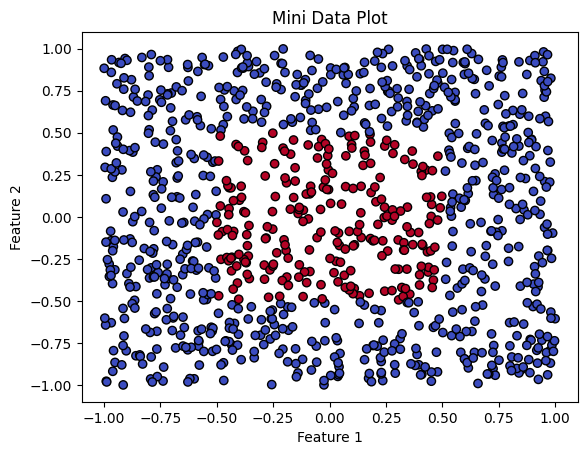

In [2]:
data = np.loadtxt("mini-data.txt")
X, y = data[:, :2], data[:, 2]
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Mini Data Plot")
plt.show()

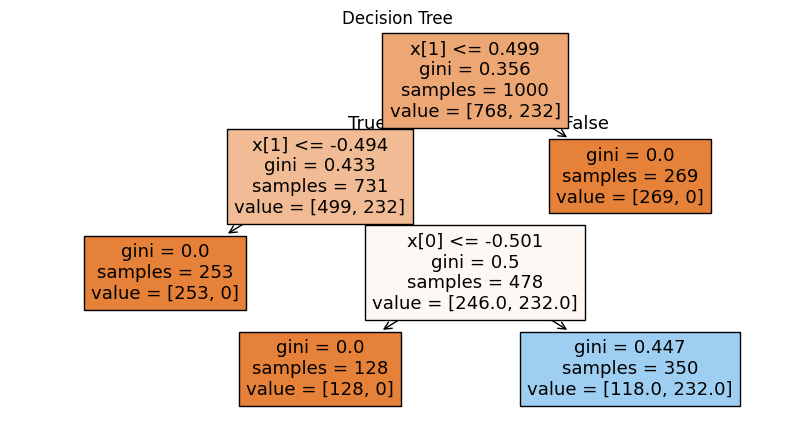

In [48]:
# Stopping criteria used is max depth of decision tree, equal to 3
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)
plt.figure(figsize=(10, 5))
plot_tree(dt, filled=True)
plt.title("Decision Tree")
plt.show()

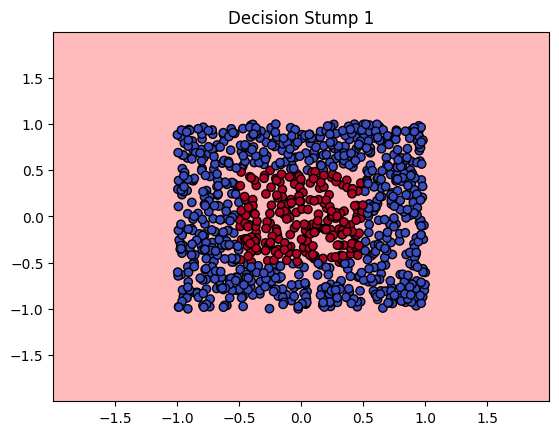

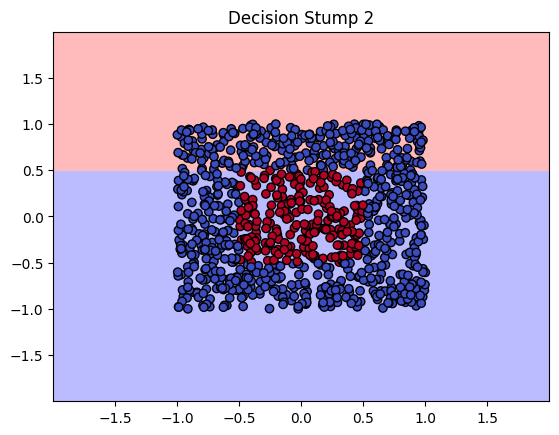

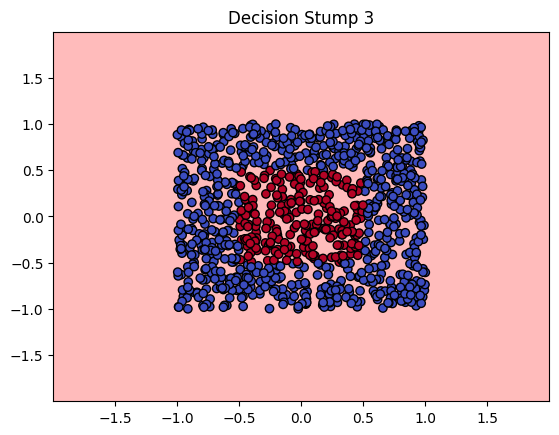

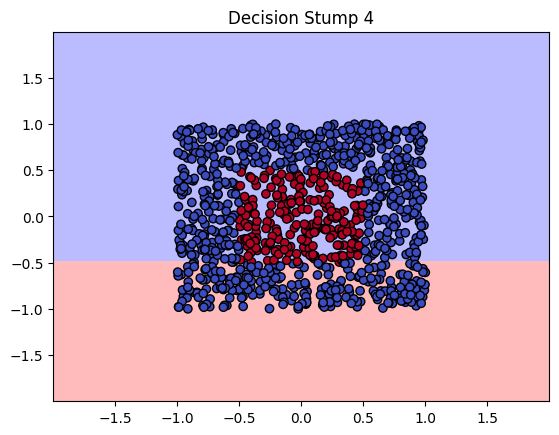

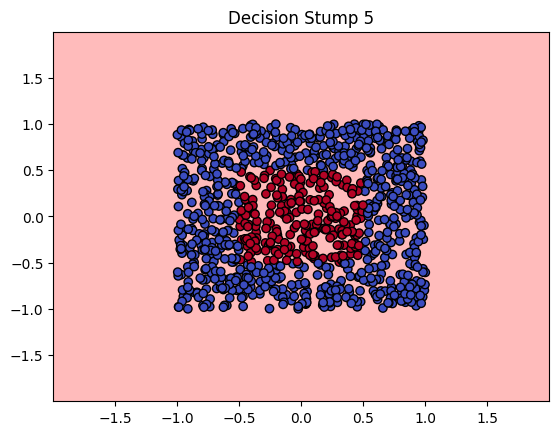

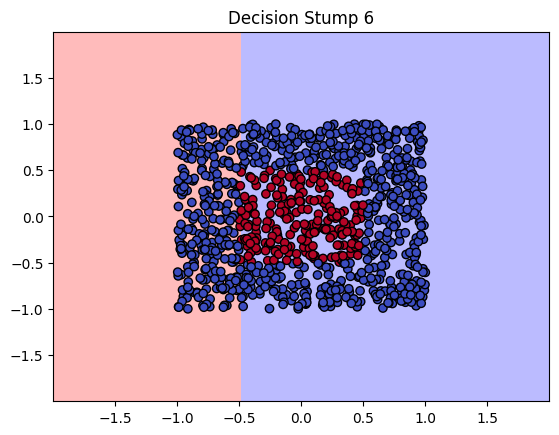

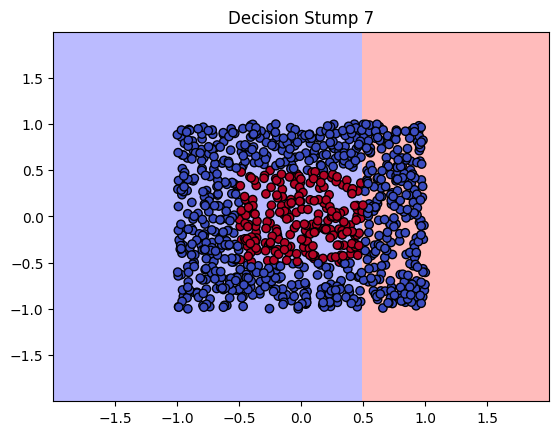

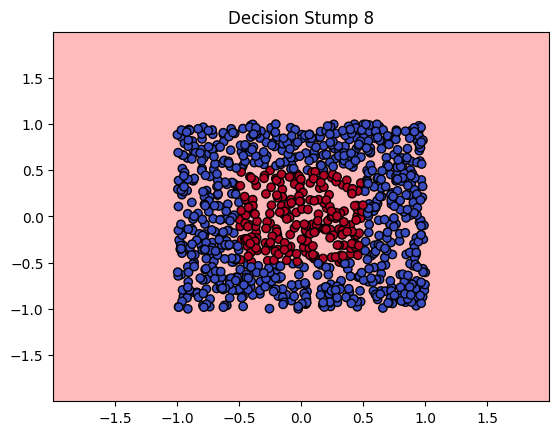

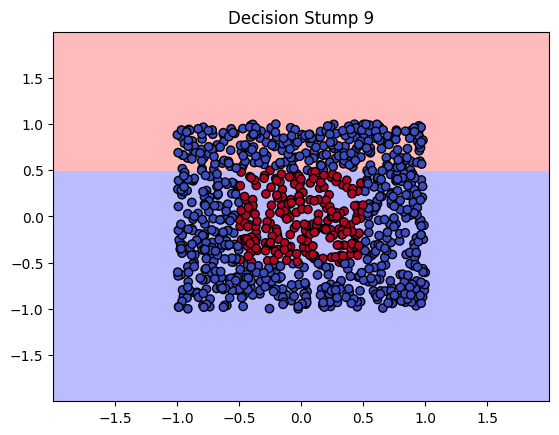

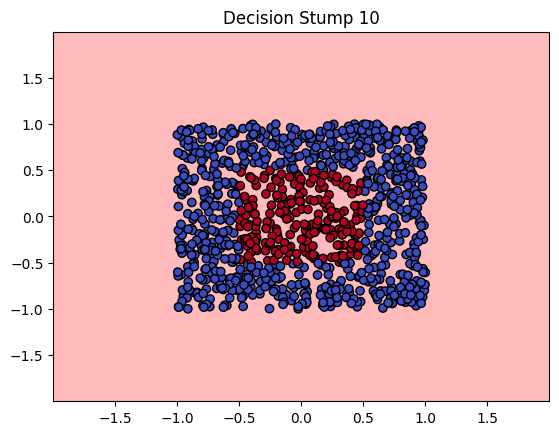

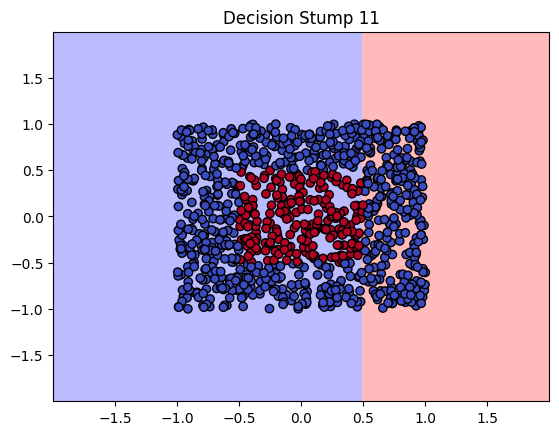

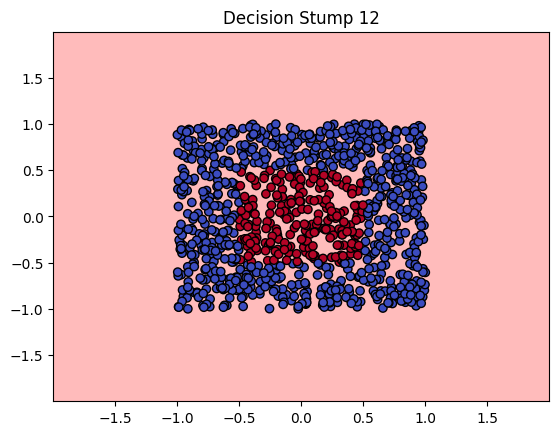

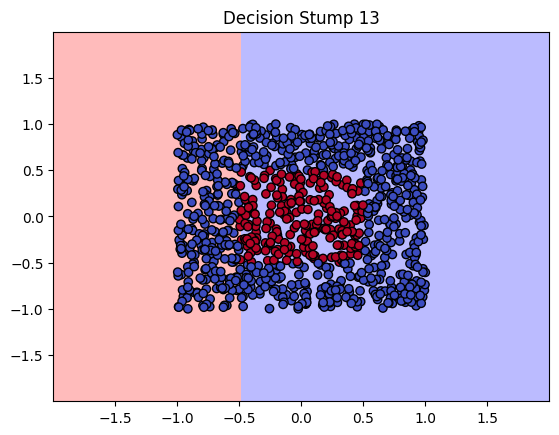

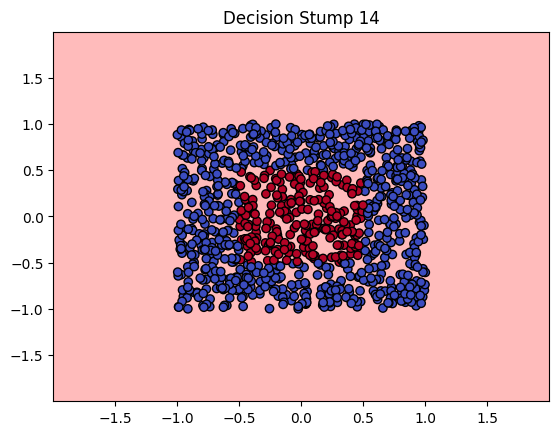

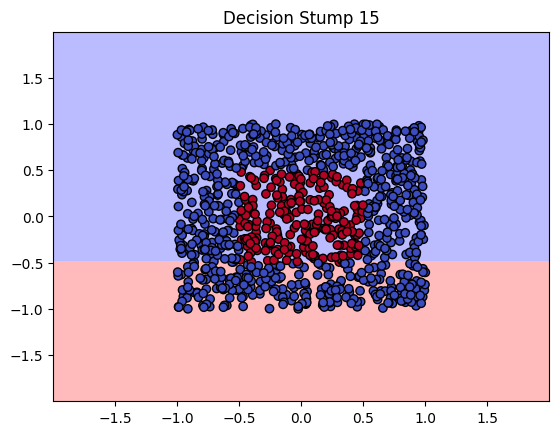

Boosting Accuracy per Stump:
Stump 1: 0.7680
Stump 2: 0.7680
Stump 3: 0.7680
Stump 4: 0.7680
Stump 5: 0.7680
Stump 6: 0.8820
Stump 7: 1.0000
Stump 8: 0.7680
Stump 9: 1.0000
Stump 10: 0.7680
Stump 11: 1.0000
Stump 12: 1.0000
Stump 13: 1.0000
Stump 14: 1.0000
Stump 15: 1.0000


In [51]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=15)
ada.fit(X, y)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['r', 'b']
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

for i, stump in enumerate(ada.estimators_):
    Z = stump.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(f"Decision Stump {i+1}")
    plt.show()

train_errors = [accuracy_score(y, pred) for pred in ada.staged_predict(X)]
print("Boosting Accuracy per Stump:")
for i, acc in enumerate(train_errors, start=1):
    print(f"Stump {i}: {acc:.4f}")

In [46]:
df = pd.read_csv("creditcard.csv")
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


## Problem 7a. There are 492 fradulent cases. This can be problematic because models focus on maximizing overall accuracy, which may lead to poor performance on classifying the class with less examples, in this dataset the fradulent cases.

In [52]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
legit_downsampled = resample(legit, replace=False, n_samples=len(fraud) * 3, random_state=42)
df_balanced = pd.concat([legit_downsampled, fraud])
X_balanced = df_balanced.drop(columns=['Class'])
y_balanced = df_balanced['Class']
print(df_balanced['Class'].value_counts())

Class
0    1476
1     492
Name: count, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [18]:
dt_fraud = DecisionTreeClassifier()
ada_fraud = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=4)
rf_fraud = RandomForestClassifier()

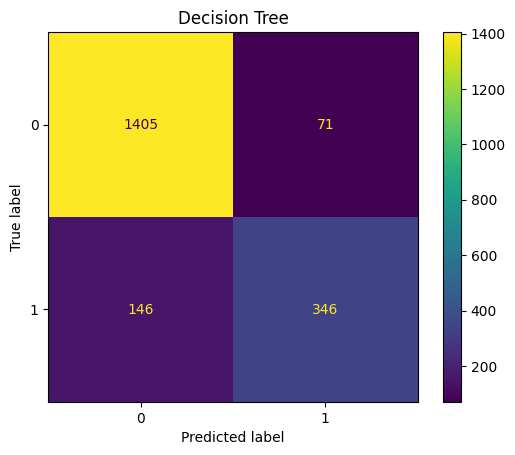

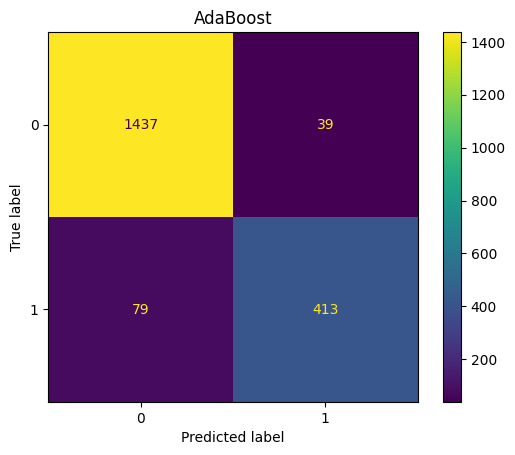

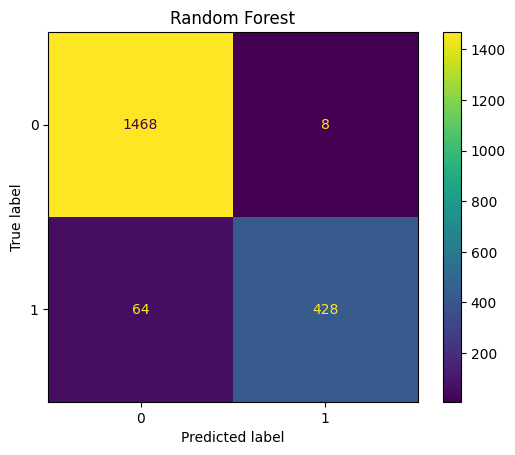

In [19]:
dt_pred = cross_val_predict(dt_fraud, X_balanced, y_balanced, cv=5)
ada_pred = cross_val_predict(ada_fraud, X_balanced, y_balanced, cv=5)
rf_pred = cross_val_predict(rf_fraud, X_balanced, y_balanced, cv=5)

for name, pred in zip(["Decision Tree", "AdaBoost", "Random Forest"], [dt_pred, ada_pred, rf_pred]):
    cm = confusion_matrix(y_balanced, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(name)
    plt.show()